<p style="font-family: Arial; font-size:3.95em;color:green; font-style:bold"><br>
Inteligentná analýza údajov</p><br>

## Dataset č. 79
Pavol Grofčík  
Dennis Sobolev

In [1]:
#Import knižníc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### Dataset Personal_train.csv

Najprv preskúmame dataset s názvom `Personal_train.csv`, pretože obsahuje pomerne menej dát a zobrazíme si zistené hodnoty pomocou deskriptívnej štatistky a pomocné vizualizácie.

In [ ]:
path = "./Datasets/personal_train.csv"

In [ ]:
df_personal = pd.read_csv(path, names = ["Name", "Address", "Age", "Sex", "Date_of_Birth"])
df_personal = df_personal.drop(df_personal.index[0])
df_personal.head()

In [ ]:
df_personal.info()

In [ ]:
df_personal.dtypes

In [ ]:
df_personal.shape

In [ ]:
#Počet NULL values v stĺpci Age
sum(df_personal.Age.isnull())

### Analýza po jednotlivých stĺpcoch

In [ ]:
data = pd.to_numeric(df_personal.Age,downcast="integer")
data.describe()

### Chyba 1-2
- **_Age_** vychýlené hodnoty  
- **_Date__of__Birth_** - neplatná hodnota

In [ ]:
#Out of range hodnoty
df_personal.iloc[1821]

In [ ]:
#Duplicity mien - "Terry Murphy"
df_personal.Name.astype(dtype=str)
df_personal.Name.value_counts().head()

### Chyba 3
- **_Date_of_Birth_** rôzny formát dátumov

In [ ]:
#Rôzny formát dátumov + datetime
df_personal.Date_of_Birth.tail(10)

In [ ]:
# Znečistené dáta
df_personal.Sex.value_counts()

## Dataset Other_train.csv

In [2]:
#Načítanie path k datasetu
!pwd
!ls -lh
path2 = "./Datasets/other_train.csv"

/home/pavol/Plocha/INANU
total 6,9M
-rw-r--r-- 1 pavol pavol  16K okt 25  2018  Analysis.ipynb
-rw-r--r-- 1 pavol pavol  46K okt 25  2018 'Analysis - other.ipynb'
-rw-r--r-- 1 pavol pavol 171K okt 25 21:46  Data_Analysis.ipynb
drwxr-xr-x 2 pavol pavol 4,0K okt 25  2018  Datasets
-rw-r--r-- 1 pavol pavol 1,4K okt 25  2018  Errors.txt
-rw-r--r-- 1 pavol pavol 6,6M okt 25  2018  PythonGraphs.ipynb
-rw-r--r-- 1 pavol pavol   62 okt 25  2018  README.md


In [3]:
pd_other = pd.read_csv(path2,index_col=0)
pd_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,"65701 Choi Course Apt. 280\nNorth Williamton, ...",f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


In [ ]:
len(pd_other.columns)

In [ ]:
pd_other.dtypes

In [ ]:
#Null hodnoty
pd_other.isnull().sum()

## Chyba 4
- **education-num** záporné hodnoty

In [ ]:
pd_other["education-num"].describe()

In [ ]:
sns.distplot(pd_other["education-num"].describe())

Z distribúcie hodnôt môžno vidieť aj záporné hodnoty, ktoré sú neočakávané pri education-num

## Chyba 5 
- **capital-gain** vysoká varianca hodnôt

In [ ]:
sns.distplot(pd_other["capital-gain"].describe())

## Chyba 6
- **on antithyroid medication** Nesprávny formát: f, F, FALSE, f.2  ...

In [ ]:
pd_other["on antithyroid medication"].unique()

## Chyba 7
- **medical_info** json formát

In [ ]:
pd_other["medical_info"].head()

## Chyba 8
- **workclass** nesprávny formát + whitespace ?, ??

In [ ]:
pd_other["workclass"].unique()

## Chyba 9
- **class** nesprávny formát: negative.| , negative._

In [ ]:
pd_other["class"].value_counts().head(10)

## Chyba 10
- **on antithyroid medication** nesprávny formát: f, FALSE, F, f.2, T, t, TRUE ...

In [ ]:
pd_other["on antithyroid medication"].unique()

## Ďalšie zaujímavé zistenia

In [ ]:
#Other hodnota - prilíš veľká početnost
pd_other["referral source"].value_counts()

In [ ]:
#Duplikácia mien
pd_other["name"].value_counts().head(10)

In [ ]:
#Celý stĺpec obsahuje iba ? hodnoty
pd_other["TBG"].value_counts()

In [ ]:
#Nesprávny formát - whitespace pred marital_status
pd_other.relationship.unique()

In [ ]:
#Podobnosť so stĺpcom relationships, Married-...
pd_other["marital-status"].unique()

In [ ]:
#Zvláštne hodnoty - t.4 ???
pd_other["FTI measured"].unique()

In [ ]:
#Vysoká variancia hodnôt pre stĺpec FTI
tmp = pd_other.FTI
tmp = tmp.apply(pd.to_numeric, errors='coerce').dropna()
tmp = tmp.describe()
sns.distplot(tmp)

In [ ]:
pd.scatter_matrix(pd_other, figsize = (40, 40))
plt.show()

Duplicitné hodnoty s rovnakými/rôznymi adresami

## Hormóny - tyreotropín
**TSH** - stimuluje výrobu iných hormónov v štítnej žľaze - T3/T4  
Ak **T4** je nedostatok -TSH sa zvýši  
Nízky stupeň T4 vs autoimúnny -> imunitný systém zabraňuje produkcie T4  

Delí sa na dve skupiny T4U - unboud
TT4 - total tyreotropín

T3 analýza sa uskutočnuje po TSH a TT4, pretože TT4 sa dá sekundárne transformovať na T3 => málo signifikatná

TBG - ignorujeme, pretože obsahuje prázdny

***Tumor***  výsledok hypoprodukcie alebo ***goitre***(med. struna/hrvoľ)

Poruchy štítnej žľazy
>**increased** - hyperfunkcia  
>**decreased** - hypofunkcia  

On anthyroid medication - medikanty proti tvorbe hormónov štítnej žlazy


### Splitting the class column into 2 

In [4]:
pd_other["class"] = pd_other["class"].str.replace("_","")
pd_other["class"] = pd_other["class"].str.replace("|", "")
pd_other["class"].head()

0    increased binding protein.2384
1                      negative.358
2                     negative.1247
3                     negative.1829
4                     negative.3531
Name: class, dtype: object

In [5]:
pd_other[["class", "class_protein"]] = pd_other["class"].str.split(".",expand = True)

In [6]:
pd_other[["class", "class_protein"]].head(10)

,class,class_protein
0,increased binding protein,2384
1,negative,358
2,negative,1247
3,negative,1829
4,negative,3531
5,negative,2179
6,negative,2651
7,negative,3111
8,negative,3738
9,negative,2001


In [ ]:
pd_other.columns

In [ ]:
x = pd_other["sick"].isna().dropna()
x.unique()

In [ ]:
pd_other["hours-per-week"].isna().dropna()

In [ ]:
pd_other.race.isna().dropna()


Text(0.5, 1.0, 'Hormone TSH vs T4U Correlation')

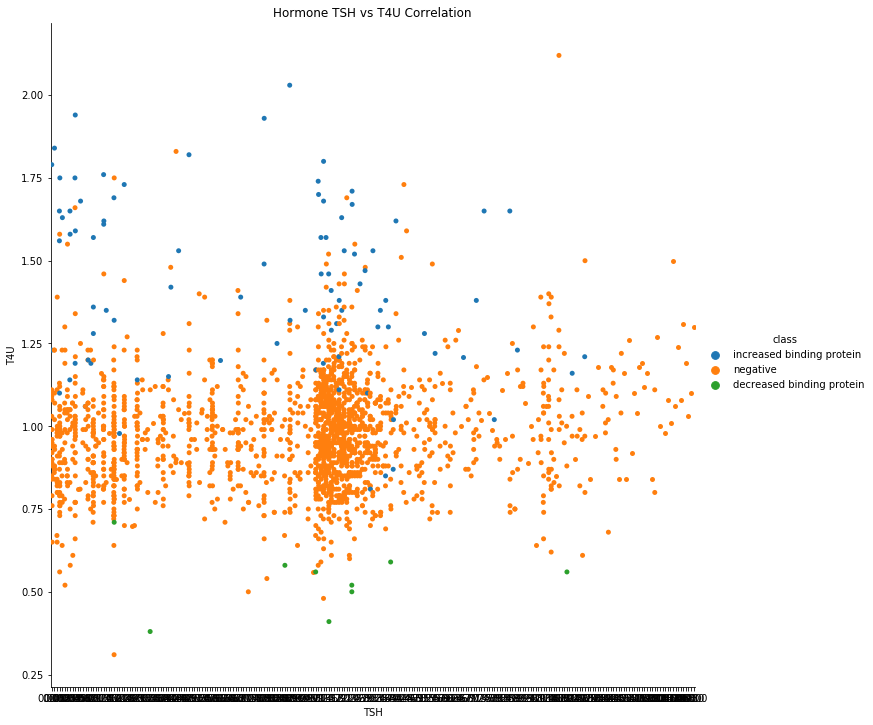

In [7]:
sns.catplot(x="TSH",y="T4U",hue="class",data=pd_other, height=10)
plt.title("Hormone TSH vs T4U Correlation")

### Heatmap


Text(0.5, 1.0, 'Correlation of Hormones')

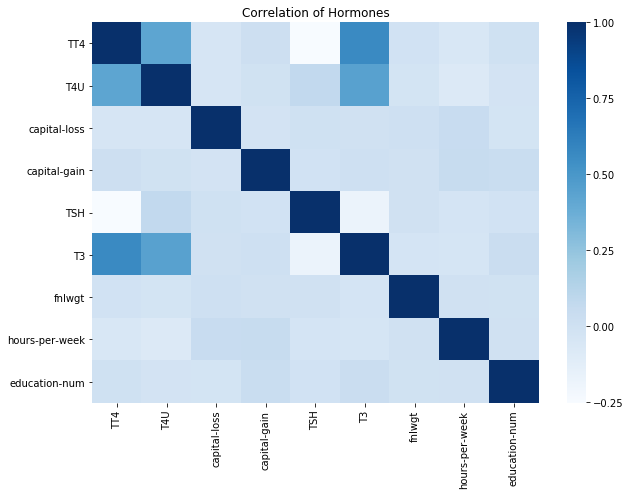

In [25]:
corr = pd_other.select_dtypes(exclude="object").corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,cmap="Blues")
plt.title("Correlation of Hormones")


# Analýza korelácií

Z mapy je jasné, že korelujú hormóny **TSH, TT4, T4U, T3**  

Zaujímavé je že **klesajúca hodnota hormónu T4 je príčinou rastu TSH**, čo je z medicinálneho pohľadu pravdou, pretože hormón TSH je riadiaci hormón produkovaný hypofýzou, ktorý sa produkuje za podmienku že hladina hormónov T4 a T4 je buď nízka alebo vysoká  

Z nášho datasetu je hodnota T4 nízka, čiže hypofýza produkuje TSH, aby zvýšil množstvo hormónu T4

Eventuálne, je aj nepriama korelácia pre hormón **T3**, ktorý stimuluje produkciu TSH, hypofýzou, T3 pochádza z ***dejodizáciou hormónu T4***

Ďalšou znalosťou je vysoká koncentrácia hormónov T3 je dobrá na **meranie hypertyroidu**.

Hormón **T3** sa môže *znížiť* ako dôsledok:  
>**Deficit Jódu**  
>**I131 - rádioaktívna liečba nuklidom prvku I 131**   
>**Neurová Anorexia**
>**Hypotyreóza**  

Príčiny *zvýšenia* **T3**  
>**Disfunkcia štítnej žľazy po tehotenstve**  
>**Tumor štítnej žľazy**  
>**Goitre - zvýšenie veľkosti štítnej žľazy**

## Analýza hormónu T4

Hormón **T4U** zvýšený:  
>**Goitre**  
>**Tyrióza**  
>**Dysfunckia štítnej žľazy po tehotenstve**

Príčiny zníženia:  
>**Začiatočná hypoterióza**  
>**Autoimúnna tyrióza**  
>**Deficit Jódu**  
>**Goitre**
